In [1]:
from skimage import color, io, util
import matplotlib.pyplot as plt
import numpy as np

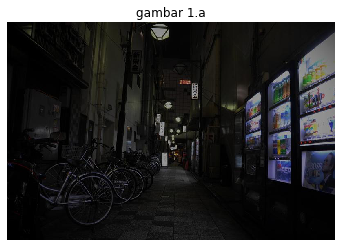

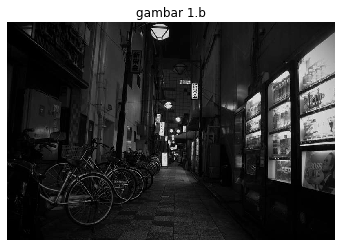

In [2]:
img1 = io.imread('./Tugas Lab 2 - Image/ueno.jpg')
img1gray = color.rgb2gray(img1)
#nomor 1 a
plt.subplot(); plt.imshow(img1)
plt.title('gambar 1.a'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(img1gray,cmap=plt.cm.gray)
plt.title('gambar 1.b'); plt.axis("off")
plt.show()

/home/farihin/env-pengcit/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


175


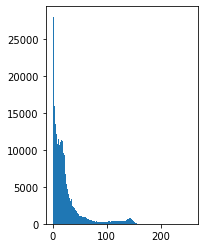

In [3]:
#nomor 1 b
from skimage import util
gray = util.img_as_ubyte(color.rgb2gray(img1))
plt.subplot(1,2,1); plt.hist(gray.flatten(), 256, range=(0,256))
plt.show()

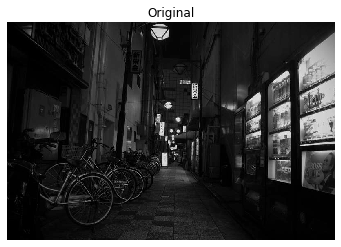

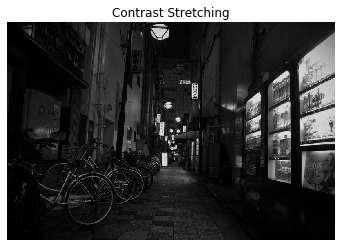

In [4]:
import numpy as np
# nomor 1 c
mn = min(img1gray.flatten())
mx = max(img1gray.flatten())
b=int(np.floor(255 / (mx - mn)))
img1cs = (img1gray-mn)*b
plt.subplot(); plt.imshow(img1gray,cmap=plt.cm.gray)
plt.title('Original'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(img1cs,cmap=plt.cm.gray)
plt.title('Contrast Stretching'); plt.axis("off")
plt.show()


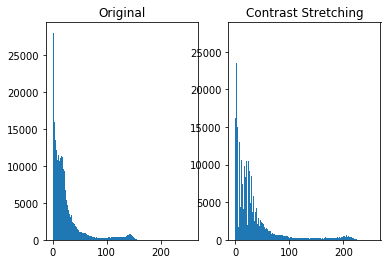

In [5]:
from skimage import util
gray = util.img_as_ubyte(color.rgb2gray(img1))
plt.subplot(1,2,1); plt.hist(gray.flatten(), 256, range=(0,256))
plt.title('Original'); 
gray2 = util.img_as_float(color.rgb2gray(img1cs))
plt.subplot(1,2,2); plt.hist(gray2.flatten(), 256, range=(0,256))
plt.title('Contrast Stretching');
plt.show()

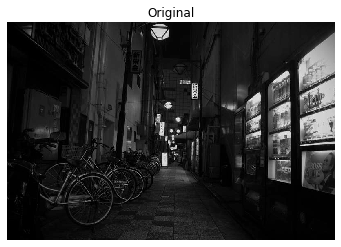

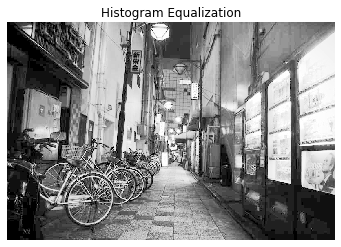

In [6]:
#nomor 1 d
from skimage import exposure
img1he = exposure.equalize_hist(img1gray)
plt.subplot(); plt.imshow(img1gray,cmap=plt.cm.gray)
plt.title('Original'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(img1he,cmap=plt.cm.gray)
plt.title('Histogram Equalization'); plt.axis("off")
plt.show()

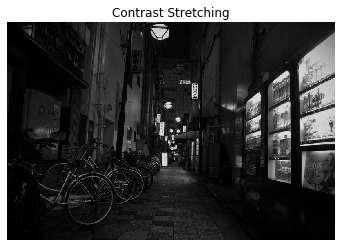

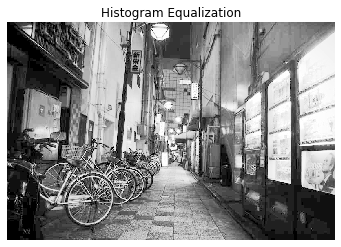

In [7]:
#nomor 1 e 
plt.subplot; plt.imshow(img1cs,cmap=plt.cm.gray)
plt.title('Contrast Stretching'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(img1he,cmap=plt.cm.gray)
plt.title('Histogram Equalization'); plt.axis("off")
plt.show()

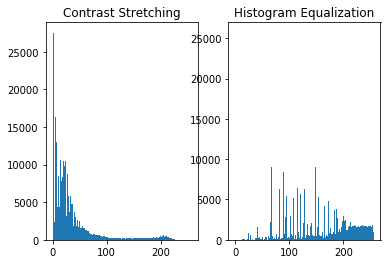

In [8]:
plt.subplot(1,2,1); plt.hist(gray2.flatten(), 256, range=(0,256))
plt.title('Contrast Stretching');
he = util.img_as_ubyte(color.rgb2gray(img1he))
plt.subplot(1,2,2); plt.hist(he.flatten(), 256, range=(0,256))
plt.title('Histogram Equalization');
plt.show()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


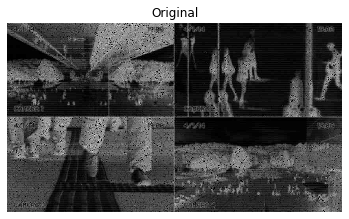

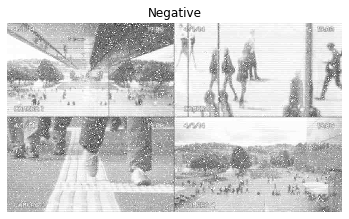

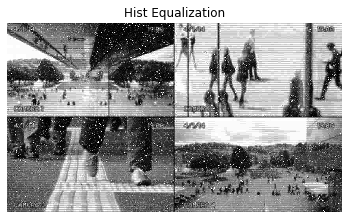

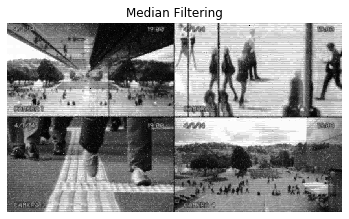

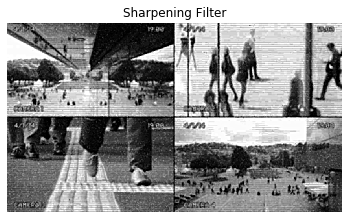

In [9]:
# no 2
i1 = io.imread('./Tugas Lab 2 - Image/cctv.jpg')
i2 = 255-i1
from skimage import exposure
i3 = exposure.equalize_hist(i2)
io.imsave('img2_1.png', i2)
io.imsave('img2_2.png', i3)

from skimage import filters, morphology
ave = filters.rank.mean(i3,selem=morphology.square(3))
gau = util.img_as_ubyte(filters.gaussian(i3, sigma=1))
noise = util.img_as_ubyte(util.random_noise(i3,mode='s&p',salt_vs_pepper=0.02))
med = filters.rank.median(noise,selem=morphology.square(3))
maks=filters.rank.maximum(i3,selem=morphology.square(3))
mins=filters.rank.minimum(i3,selem=morphology.square(3))

#sharpening image
fi = filters.rank.mean(med, selem=morphology.square(3))
sh = filters.unsharp_mask(fi, radius=3)

io.imsave('img2_ave.png', ave)
io.imsave('img2_gau.png', gau)
io.imsave('img2_med.png', med)
io.imsave('img2_maks.png', maks)
io.imsave('img2_min.png', mins)
io.imsave('img2_sh.png', sh)

plt.subplot(); plt.imshow(i1,cmap=plt.cm.gray)
plt.title('Original'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(i2,cmap=plt.cm.gray)
plt.title('Negative'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(i3,cmap=plt.cm.gray)
plt.title('Hist Equalization'); plt.axis("off")
plt.show()
plt.subplot();plt.imshow(med,cmap='gray',vmin=0,vmax=255)
plt.title('Median Filtering'); plt.axis("off")
plt.show()
plt.subplot();plt.imshow(sh,cmap=plt.cm.gray)
plt.title('Sharpening Filter'); plt.axis("off")
plt.show()

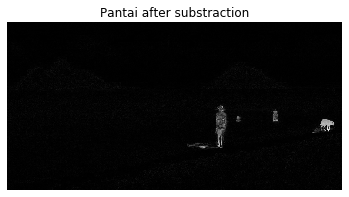

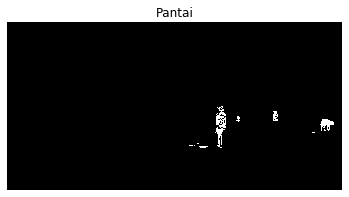

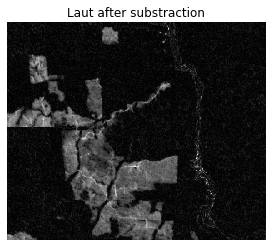

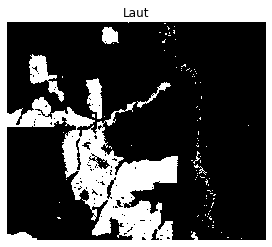

In [15]:
# no 3
from skimage import color, io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu

pantai1 = io.imread('./Tugas Lab 2 - Image/pantai1.jpg')
pantai2 = io.imread('./Tugas Lab 2 - Image/pantai2.jpg')
pantai_subs = abs(np.subtract(pantai1,pantai2, dtype='int16'))
pantai_subs = color.rgb2gray(pantai_subs)
plt.subplots()
plt.imshow(pantai_subs,cmap='gray')
plt.title('Pantai after substraction');plt.axis('off')
plt.show()

image = pantai_subs
global_thresh_pantai = threshold_otsu(image)
binary_global_pantai = image > global_thresh_pantai

plt.subplots()
plt.imshow(binary_global_pantai,cmap='gray')
plt.title('Pantai');plt.axis('off')
plt.show()



laut1 = io.imread('./Tugas Lab 2 - Image/teles2010.jpg')
laut2 = io.imread('./Tugas Lab 2 - Image/teles2000.jpg')
laut_subs = abs(np.subtract(laut1,laut2, dtype='int16'))
laut_subs = color.rgb2gray(laut_subs)
plt.plot()
plt.imshow(laut_subs,cmap='gray')
plt.title('Laut after substraction');plt.axis('off')
plt.show()

image = laut_subs
global_thresh_laut = threshold_otsu(image)
binary_global_laut = image > global_thresh_laut

plt.plot()
plt.imshow(binary_global_laut,cmap='gray')
plt.title('Laut'); plt.axis("off")
plt.show()